In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from skbio.diversity import alpha_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
import matplotlib.pyplot as plt

In [2]:
illumina_taxa = pd.read_csv('../illumina_Dan/final.minimap.cons.taxonomy', sep = '\t')
illumina_taxa = illumina_taxa[illumina_taxa['OTU'] != 'OTU1']
print(illumina_taxa.shape)
illumina_taxa.head()

(57332, 3)


,OTU,Size,Taxonomy
1,OTU2,5.0,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f...
2,OTU3,2.0,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;...
3,OTU4,1.0,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;...
4,OTU5,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
5,OTU6,44.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...


In [3]:
illumina_otus = pd.read_csv('../illumina_Dan/final.minimap.shared', sep = '\t')
illumina_otus = illumina_otus.drop('OTU1', axis = 1)
illumina_otus.set_index('group', inplace = True)
illumina_otus.drop(['label','numOtus'], axis = 1, inplace = True)
illumina_otus.columns = illumina_taxa['Taxonomy']
illumina_otus.index = illumina_otus.index + '_I'
illumina_otus = illumina_otus[(illumina_otus.index.str.contains('V')) & (illumina_otus.index.str.contains('Pro')) & 
                             (~illumina_otus.index.str.contains('H20'))]
illumina_otus = illumina_otus.loc[:, illumina_otus.sum(axis=0) > 0]
print(illumina_otus.shape)
illumina_otus.head()

(24, 39944)


Taxonomy,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_235289;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_254851;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_257814;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2819049;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4275185;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4336412;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4381737;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_541793;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_I,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,2,0,0,0,0,0
ARD-V-Pro-85E-2_I,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
ARD-V-Pro-85E-3_I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
ARD-V-Pro-86E-1_I,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
ARD-V-Pro-86E-2_I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [4]:
minion_full_barcodes = pd.read_csv('../barcodes.csv', index_col=0)
minion_full_barcodes = minion_full_barcodes[minion_full_barcodes.index != 'barcode18']
print(minion_full_barcodes.shape)
minion_full_barcodes.head()

(85, 5)


,Library,Site,Plot,Rep,group
sample_name,,,,,
barcode01,Library1,ARDEC,85E,RepA,ARD_85E_Library1_A
barcode02,Library1,ARDEC,85E,RepB,ARD_85E_Library1_B
barcode03,Library1,ARDEC,85E,RepC,ARD_85E_Library1_C
barcode04,Library1,ARDEC,86E,RepA,ARD_86E_Library1_A
barcode05,Library2,ARDEC,85E,RepA,ARD_85E_Library2_A


In [5]:
minion_full_taxa = pd.read_csv('../minion_Dan/minimap/final.minimap.cons.taxonomy', sep = '\t')
minion_full_taxa = minion_full_taxa[minion_full_taxa['OTU'] != 'OTU1']
minion_full_taxa

,OTU,Size,Taxonomy
1,OTU2,4.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
2,OTU3,112.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
3,OTU4,1.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
4,OTU5,1.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
5,OTU6,4.0,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o_...
...,...,...,...
58286,OTU58287,4.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58287,OTU58288,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58288,OTU58289,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...
58289,OTU58290,3.0,k__Bacteria;p__unclassified;c__unclassified;o_...


In [6]:
minion_full_otus = pd.read_csv('../minion_Dan/minimap/final.minimap.shared', sep = '\t')
minion_full_otus = minion_full_otus.drop('OTU1', axis = 1)
minion_full_otus = minion_full_otus[minion_full_otus['group'] != 'barcode18']
minion_full_otus = minion_full_otus[minion_full_otus['group'].isin(minion_full_barcodes.index)]
minion_full_otus['group'] = minion_full_barcodes['group'].values
minion_full_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_full_otus['group'] = minion_full_otus['group'] + '_MF'
minion_full_otus.set_index('group', inplace = True)
minion_full_otus.columns = minion_full_taxa['Taxonomy']
minion_full_otus = minion_full_otus[(minion_full_otus.index.str.contains('Library3')) & ((minion_full_otus.index.str.contains('ARD')) 
                                                                                         |(minion_full_otus.index.str.contains('Pen')) )]
minion_full_otus = minion_full_otus.loc[:, minion_full_otus.sum(axis=0) > 0]
print(minion_full_otus.shape)
minion_full_otus.head()

(24, 42181)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__unclassified;otu__gg_780322;,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_814111;,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__unclassified;g__unclassified;s__unclassified;otu__gg_269089;,k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__Thermoplasmatales;f__BSLdp215;g__unclassified;s__unclassified;otu__gg_815952;,k__Bacteria;p__AC1;c__SHA-114;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_313497;,k__Bacteria;p__AC1;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_555954;,k__Bacteria;p__AD3;c__ABS-6;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1108593;,k__Bacteria;p__AD3;c__ABS-6;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1111807;,k__Bacteria;p__AD3;c__ABS-6;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1113203;,k__Bacteria;p__AD3;c__ABS-6;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_114339;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_254851;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2819049;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4275185;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4361631;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
group,,,,,,,,,,,,,,,,,,,,,
ARD_85E_Library3_A_MF,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
ARD_85E_Library3_B_MF,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ARD_85E_Library3_C_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ARD_86E_Library3_A_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARD_86E_Library3_B_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
minion_short_barcodes = pd.read_csv('../minion_Illumina_primers_Dan/barcodes_Illumina_minion.csv', index_col=0)
minion_short_barcodes['Barcode'] = ['barcode' + str(x).zfill(2) for x in minion_short_barcodes['Barcode']]
minion_short_barcodes['group'] = minion_short_barcodes.index
print(minion_short_barcodes.shape)
minion_short_barcodes.head()

(30, 2)


,Barcode,group
Sample,,
ARD-V-Pro-85E-1,barcode01,ARD-V-Pro-85E-1
ARD-V-Pro-85E-2,barcode02,ARD-V-Pro-85E-2
ARD-V-Pro-85E-3,barcode03,ARD-V-Pro-85E-3
ARD-V-Pro-86E-1,barcode04,ARD-V-Pro-86E-1
ARD-V-Pro-86E-2,barcode05,ARD-V-Pro-86E-2


In [8]:
minion_short_taxa = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.cons.taxonomy', sep = '\t')
minion_short_taxa = minion_short_taxa[minion_short_taxa['OTU'] != 'OTU1']
print(minion_short_taxa.shape)
minion_short_taxa.head()

(53031, 3)


,OTU,Size,Taxonomy
1,OTU2,13.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
2,OTU3,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
3,OTU4,8.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
4,OTU5,7.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
5,OTU6,6.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...


In [9]:
minion_short_otus = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.shared', sep = '\t')
minion_short_otus.drop('OTU1', axis = 1, inplace = True)
minion_short_otus = minion_short_otus[minion_short_otus['group'].isin(minion_short_barcodes['Barcode'])]
minion_short_barcodes = minion_short_barcodes[minion_short_barcodes['Barcode'].isin(minion_short_otus['group'])]
minion_short_otus['group'] = minion_short_barcodes.index.values
minion_short_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_short_otus['group'] = minion_short_otus['group'] + '_MI'
minion_short_otus.set_index('group', inplace = True)
minion_short_otus.columns = minion_short_taxa['Taxonomy']
minion_short_otus = minion_short_otus[(~minion_short_otus.index.str.contains('H20'))]
minion_short_otus = minion_short_otus[(~minion_short_otus.index.str.contains('Zymo'))]
low_reads_df = pd.DataFrame(minion_short_otus.sum(axis = 1))
low_reads = low_reads_df[low_reads_df[0] < 500].index
minion_short_otus = minion_short_otus[~minion_short_otus.index.isin(low_reads)]
print(minion_short_otus.shape)
minion_short_otus.head()

(20, 53031)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1170;otu__gg_101071;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4407785;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_562348;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_653625;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_669210;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_823663;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_MI,1,0,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,1,0
ARD-V-Pro-85E-2_MI,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,1,0,0,0
ARD-V-Pro-85E-3_MI,0,0,0,1,0,0,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
ARD-V-Pro-86E-1_MI,1,0,0,1,0,0,0,0,0,8,...,0,0,0,0,0,1,0,0,1,0
ARD-V-Pro-86E-2_MI,2,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,1,0,0,0,0


In [42]:
dada2_taxa = pd.read_csv('../illumina_Dan/dada.cons.taxonomy', sep = '\t')
print(dada2_taxa.shape)
dada2_taxa.head()

(11336, 3)


,OTU,Seq,Taxonomy
0,OTU1,TGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCGACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
1,OTU2,TGGGGAATATTGGACAATGGGCGCAAGCCTGATCCAGCCATGCCGC...,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...
2,OTU3,TGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCAACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...
3,OTU4,CAAGGAATCTTCCGCAATGGGGGCAACCCTGACGGAGCAACGCCGC...,k__unclassified;p__unclassified;c__unclassifie...
4,OTU5,TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCGACGCCGC...,k__Bacteria;p__Actinobacteria;c__Actinobacteri...


In [56]:
dada2_otus = pd.read_csv('../illumina_Dan/dada.shared', sep = '\t')
dada2_otus.set_index('group', inplace = True)
dada2_otus.drop(['label','numOtus'], axis = 1, inplace = True)
dada2_otus.columns = dada2_taxa['Taxonomy']
dada2_otus.index = dada2_otus.index + '_D'
dada2_otus_t = dada2_otus.T
dada2_otus_t['Taxa'] = dada2_otus_t.index
dada2_otus_t = dada2_otus_t.groupby('Taxa').sum()
dada2_otus = dada2_otus_t.T
dada2_otus = dada2_otus[(dada2_otus.index.str.contains('V')) & (dada2_otus.index.str.contains('Pro')) & 
                             (~dada2_otus.index.str.contains('H20'))]
dada2_otus = dada2_otus[~dada2_otus.index.str.contains('Zym')]
print(dada2_otus.shape)
dada2_otus.head()

(24, 2906)


Taxa,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1133685;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1902950;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2068084;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4044206;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4314636;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4328498;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4329542;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4339223;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_44004;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-5;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_512534;,...,k__Bacteria;p__WPS-2;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_797182;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_136216;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2065775;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4477112;,k__Bacteria;p__WS2;c__SHA-109;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_65677;,k__Bacteria;p__WS3;c__PRR-12;o__LD1-PA13;f__unclassified;g__unclassified;s__unclassified;otu__gg_808847;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_1128107;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_113334;,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__unclassified;g__unclassified;s__unclassified;otu__gg_4336217;,k__unclassified;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__unclassified;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_D,0,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,17,4243
ARD-V-Pro-85E-2_D,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,3393
ARD-V-Pro-85E-3_D,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,6298
ARD-V-Pro-86E-1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,5382
ARD-V-Pro-86E-2_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,5413


In [10]:
full_otu_df = pd.concat([illumina_otus, minion_short_otus, minion_full_otus]).fillna(0)
samples = []
for i in full_otu_df.index:
    if ('Cal' in i) or ('H2' in i) or ('Zymo' in i):
        print(i)
        pass
    elif ('ARD' in i) or ('Pen' in i):
        samples.append(i)
full_otu_df = full_otu_df[full_otu_df.index.isin(samples)]
low_reads_df = pd.DataFrame(full_otu_df.sum(axis = 1))
low_reads = low_reads_df[low_reads_df[0] < 500].index
full_otu_df = full_otu_df[~full_otu_df.index.isin(low_reads)]
print(len(low_reads))
print(full_otu_df.shape)
full_otu_df.head()

0
(68, 63728)


,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,...,k__Bacteria;p__WS6;c__SC72;o__WCHB1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_4425878;,k__Bacteria;p__WS6;c__SC72;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_695080;,k__Bacteria;p__WS6;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_254839;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__W22;s__unclassified;otu__gg_708719;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2104713;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2223778;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2093839;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4361631;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_I,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-2_I,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-3_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-1_I,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
site = []
samples = []
for i in full_otu_df.index:
    samples.append(i)
    if 'ARD' in i:
        site.append('ARD')
    elif 'Pen' in i:
        site.append('Pen')
    else:
        site.append('None')
mapping_file = pd.DataFrame({'Sample':samples, 'Site':site, 'Study': [x.split('_')[-1] for x in full_otu_df.index]})
mapping_file['Site_study'] = mapping_file['Site'] + '_' + mapping_file['Study']

In [12]:
def filter_percent_sample_threshold(df, threshold):
    for index, row in df.iterrows():
        total_count = sum(row)
        threshold_value = total_count*threshold
        df.loc[index] = row[row > threshold_value]
    return df.fillna(0)

In [13]:
def group_species(full_alpha_filtered_species, level):
    if level == 'species':
        full_alpha_filtered_species.columns = [x.split('otu')[0] for x in full_alpha_filtered_species.columns]
    elif level == 'genus':
        full_alpha_filtered_species.columns = [';'.join(x.split(';')[:-3]) + ';' for x in full_alpha_filtered_species.columns]
    else:
        print('Error')
    full_alpha_filtered_species.reset_index(inplace = True)
    full_alpha_filtered_species_melted = full_alpha_filtered_species.melt(id_vars = 'group')
    full_alpha_filtered_species_melted = full_alpha_filtered_species_melted.groupby(['group', 'variable']).sum()
    full_alpha_filtered_species_melted.reset_index(inplace = True)
    df_index = full_alpha_filtered_species_melted.groupby('group', sort=False).sum().index
    df_columns = full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['group'] == 'ARD-T-Pow-85E-1_I']['variable']
    full_alpha_filtered_species_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)

    for h in df_index:
        for k in df_columns:
            if k in full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['group']== h]['variable'].values:
                full_alpha_filtered_species_melted_reshaped.loc[h,k] = full_alpha_filtered_species_melted[(full_alpha_filtered_species_melted['group'] == h) & (full_alpha_filtered_species_melted['variable'] == k)]['value'].values[0]
            else:
                full_alpha_filtered_species_melted_reshaped.loc[i,j] = 0
    return full_alpha_filtered_species_melted_reshaped

In [14]:
observed_otus = alpha_diversity('observed_otus', full_otu_df, full_otu_df.index)

In [15]:
shannon = alpha_diversity('shannon', full_otu_df, full_otu_df.index)

In [16]:
mapping_file['observed otus'] = observed_otus.values
mapping_file['shannon'] = shannon.values
mapping_file.head()

,Sample,Site,Study,Site_study,observed otus,shannon
0,ARD-V-Pro-85E-1_I,ARD,I,ARD_I,9940,11.428968
1,ARD-V-Pro-85E-2_I,ARD,I,ARD_I,9943,11.520081
2,ARD-V-Pro-85E-3_I,ARD,I,ARD_I,11903,11.525646
3,ARD-V-Pro-86E-1_I,ARD,I,ARD_I,10581,11.323610
4,ARD-V-Pro-86E-2_I,ARD,I,ARD_I,10040,11.262303


<AxesSubplot:xlabel='Site_study', ylabel='observed otus'>

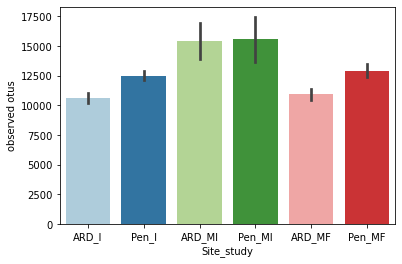

In [17]:
sns.barplot(x = 'Site_study', y = 'observed otus', data = mapping_file, palette = 'Paired')

<AxesSubplot:xlabel='Site_study', ylabel='shannon'>

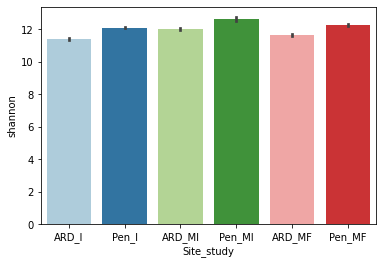

In [18]:
sns.barplot(x = 'Site_study', y = 'shannon', data = mapping_file, palette = 'Paired')

In [26]:
full_otu_df_filtered = filter_percent_sample_threshold(full_otu_df.copy(), 0.0002)

In [27]:
observed_otus_filtered = alpha_diversity('observed_otus', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['observed otus 0.0002'] = observed_otus_filtered.values
shannon_filtered = alpha_diversity('shannon', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['shannon otu 0.0002'] = shannon_filtered.values

<AxesSubplot:xlabel='Site_study', ylabel='observed otus 0.0003'>

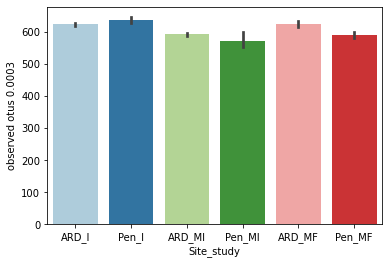

In [24]:
sns.barplot(x = 'Site_study', y = 'observed otus 0.0003', data = mapping_file, palette = 'Paired')

In [28]:
mapping_file.to_csv('../Tables/alpha_diversity_sites.csv')

In [31]:
mapping_file.groupby(['Site','Study']).std().to_csv('../Tables/alpha_diversity_sites_std.csv')

In [32]:
from scipy.stats import f_oneway

In [38]:
methods = ['I','MI','MF']
otus = ['observed otus','observed otus 0.0002','observed otus 0.0003']
for method in methods:
    for otu in otus:
        tmp_df = mapping_file[mapping_file['Study'] == method].copy()
        print(method, otu, f_oneway(tmp_df[tmp_df['Site'] == 'ARD'][otu], tmp_df[tmp_df['Site'] == 'Pen'][otu]))

I observed otus F_onewayResult(statistic=37.796458838365, pvalue=3.4563848680762925e-06)
I observed otus 0.0002 F_onewayResult(statistic=121.25034515375462, pvalue=2.0340890066109889e-10)
I observed otus 0.0003 F_onewayResult(statistic=6.087858872362503, pvalue=0.021868192209035454)
MI observed otus F_onewayResult(statistic=0.024394773431059495, pvalue=0.8776230062832685)
MI observed otus 0.0002 F_onewayResult(statistic=29.138391449026514, pvalue=3.955663287967365e-05)
MI observed otus 0.0003 F_onewayResult(statistic=3.5286749351958533, pvalue=0.07661176862981824)
MF observed otus F_onewayResult(statistic=27.23554518315272, pvalue=3.106828015166602e-05)
MF observed otus 0.0002 F_onewayResult(statistic=21.216726001491196, pvalue=0.0001372679826837758)
MF observed otus 0.0003 F_onewayResult(statistic=26.453606088110014, pvalue=3.726225207415841e-05)


In [40]:
methods = ['I','MI','MF']
otus = ['shannon','shannon otu 0.0002','shannon otu 0.0003']
for method in methods:
    for otu in otus:
        tmp_df = mapping_file[mapping_file['Study'] == method].copy()
        print(method, otu, f_oneway(tmp_df[tmp_df['Site'] == 'ARD'][otu], tmp_df[tmp_df['Site'] == 'Pen'][otu]))

I shannon F_onewayResult(statistic=592.8175522697576, pvalue=2.1061015436013514e-17)
I shannon otu 0.0002 F_onewayResult(statistic=466.6710772799994, pvalue=2.6449369718735496e-16)
I shannon otu 0.0003 F_onewayResult(statistic=272.4159615246518, pvalue=7.067794330791102e-14)
MI shannon F_onewayResult(statistic=99.80928303832869, pvalue=9.063085085691715e-09)
MI shannon otu 0.0002 F_onewayResult(statistic=204.05429873100536, pvalue=2.911083258338171e-11)
MI shannon otu 0.0003 F_onewayResult(statistic=32.30978700050328, pvalue=2.165679434584234e-05)
MF shannon F_onewayResult(statistic=286.6777392899645, pvalue=4.19337070618631e-14)
MF shannon otu 0.0002 F_onewayResult(statistic=87.32472653682034, pvalue=4.082048520758568e-09)
MF shannon otu 0.0003 F_onewayResult(statistic=0.8402788660693269, pvalue=0.3692568990945252)


In [57]:
observed_otus_dada = alpha_diversity('observed_otus', dada2_otus, dada2_otus.index)
shannon_dada = alpha_diversity('shannon', dada2_otus, dada2_otus.index)

In [68]:
observed_otus_dada_df = pd.DataFrame(observed_otus_dada)
observed_otus_dada_df['Site'] = [x[:3] for x in observed_otus_dada_df.index]
observed_otus_dada_df

,0,Site
group,,
ARD-V-Pro-85E-1_D,220,ARD
ARD-V-Pro-85E-2_D,212,ARD
ARD-V-Pro-85E-3_D,311,ARD
ARD-V-Pro-86E-1_D,254,ARD
ARD-V-Pro-86E-2_D,223,ARD
ARD-V-Pro-86E-3_D,280,ARD
ARD-V-Pro-88C-1_D,259,ARD
ARD-V-Pro-88C-2_D,265,ARD
ARD-V-Pro-88C-3_D,348,ARD


In [69]:
observed_otus_dada_df.groupby('Site').mean()

,0
Site,
ARD,261.750000
Pen,318.833333


In [70]:
observed_otus_dada_df.groupby('Site').std()

,0
Site,
ARD,42.021910
Pen,111.683671


In [71]:
f_oneway(observed_otus_dada_df[observed_otus_dada_df['Site'] == 'ARD'][0], observed_otus_dada_df[observed_otus_dada_df['Site'] == 'Pen'][0])

F_onewayResult(statistic=2.7461095927289327, pvalue=0.11168505439900465)

<AxesSubplot:xlabel='Site_study', ylabel='shannon otu 0.0003'>

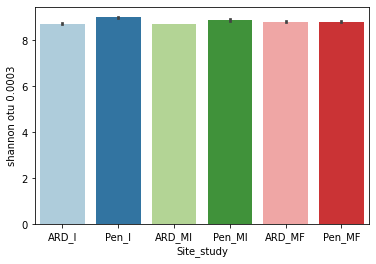

In [25]:
sns.barplot(x = 'Site_study', y = 'shannon otu 0.0003', data = mapping_file, palette = 'Paired')

In [215]:
full_otu_df_filtered = filter_percent_sample_threshold(full_otu_df.copy(), 0.00005)

In [216]:
observed_otus_filtered = alpha_diversity('observed_otus', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['observed otus 0.00005'] = observed_otus_filtered.values
shannon_filtered = alpha_diversity('shannon', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['shannon otu 0.00005'] = shannon_filtered.values

<AxesSubplot:xlabel='Site_study', ylabel='observed otus 0.00005'>

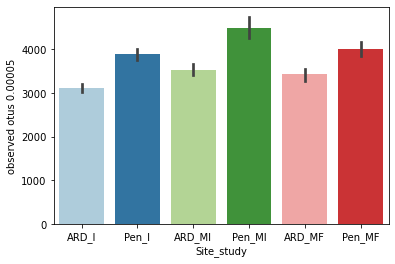

In [217]:
sns.barplot(x = 'Site_study', y = 'observed otus 0.00005', data = mapping_file, palette = 'Paired')

In [179]:
full_otu_df_filtered = filter_percent_sample_threshold(full_otu_df.copy(), 0.0001)

In [180]:
observed_otus_filtered = alpha_diversity('observed_otus', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['observed otus 0.005'] = observed_otus_filtered.values
shannon_filtered = alpha_diversity('shannon', full_otu_df_filtered, full_otu_df_filtered.index)
mapping_file['shannon otu 0.005'] = shannon_filtered.values

<AxesSubplot:xlabel='Site_study', ylabel='observed otus 0.001'>

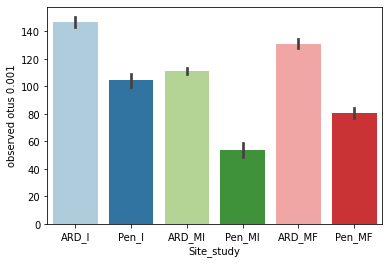

In [181]:
sns.barplot(x = 'Site_study', y = 'observed otus 0.001', data = mapping_file, palette = 'Paired')

In [182]:
mapping_file['Sample'].values

array(['ARD-V-Pro-85E-1_I', 'ARD-V-Pro-85E-2_I', 'ARD-V-Pro-85E-3_I',
       'ARD-V-Pro-86E-1_I', 'ARD-V-Pro-86E-2_I', 'ARD-V-Pro-86E-3_I',
       'ARD-V-Pro-88C-1_I', 'ARD-V-Pro-88C-2_I', 'ARD-V-Pro-88C-3_I',
       'ARD-V-Pro-89A-1_I', 'ARD-V-Pro-89A-2_I', 'ARD-V-Pro-89A-3_I',
       'Pen-V-Pro-1-1_I', 'Pen-V-Pro-1-2_I', 'Pen-V-Pro-1-3_I',
       'Pen-V-Pro-2-1_I', 'Pen-V-Pro-2-2_I', 'Pen-V-Pro-2-3_I',
       'Pen-V-Pro-3-1_I', 'Pen-V-Pro-3-2_I', 'Pen-V-Pro-3-3_I',
       'Pen-V-Pro-4-1_I', 'Pen-V-Pro-4-2_I', 'Pen-V-Pro-4-3_I',
       'ARD-V-Pro-85E-1_MI', 'ARD-V-Pro-85E-2_MI', 'ARD-V-Pro-85E-3_MI',
       'ARD-V-Pro-86E-1_MI', 'ARD-V-Pro-86E-2_MI', 'ARD-V-Pro-86E-3_MI',
       'ARD-V-Pro-88C-1_MI', 'ARD-V-Pro-88C-2_MI', 'ARD-V-Pro-88C-3_MI',
       'ARD-V-Pro-89A-1_MI', 'ARD-V-Pro-89A-2_MI', 'Pen-V-Pro-1-1_MI',
       'Pen-V-Pro-1-2_MI', 'Pen-V-Pro-1-3_MI', 'Pen-V-Pro-2-1_MI',
       'Pen-V-Pro-2-2_MI', 'Pen-V-Pro-2-3_MI', 'Pen-V-Pro-3-1_MI',
       'Pen-V-Pro-3-2_MI', 'Pen-V-Pro-3-

In [183]:
full_otus_genus = pd.read_csv('../Tables/full_otu_genus.csv', index_col=0)
full_otus_genus

,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__Korarchaeotaceae;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__MCG;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__THSCG;o__unclassified;f__unclassified;g__unclassified;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;,...,k__Bacteria;p__WS6;c__SC72;o__A-2AF;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__SC72;o__WCHB1-15;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__SC72;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__WS6;c__unclassified;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__Candidatus_Cloacamonas;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__W22;,k__Bacteria;p__WWE1;c__MSBL2;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__ZB3;c__BS119;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;
group,,,,,,,,,,,,,,,,,,,,,
ARD-T-Pow-85E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
ARD-T-Pow-85E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
ARD-T-Pow-85E-3_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
ARD-T-Pow-86E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
ARD-T-Pow-86E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pen_Plot4_Library2_B_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Pen_Plot4_Library2_C_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Pen_Plot4_Library3_A_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [184]:
# observed_genera = alpha_diversity('observed_otus', full_otus_genus, full_otus_genus.index)
# mapping_file['observed genera'] = observed_genera.values
# shannon_genera = alpha_diversity('shannon', full_otus_genus, full_otus_genus.index)
# mapping_file['shannon genera'] = shannon_genera.values

In [185]:
# sns.barplot(x = 'Site_study', y = 'observed genera', data = mapping_file, palette = 'Paired')

In [186]:
# sns.barplot(x = 'Site_study', y = 'shannon genera', data = mapping_file, palette = 'Paired')

In [187]:
mapping_file.to_csv('../Tables/alpha_diversity_thresholds.csv')

In [188]:
full_otu_df_filtered

,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,...,k__Bacteria;p__WS6;c__SC72;o__WCHB1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_4425878;,k__Bacteria;p__WS6;c__SC72;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_695080;,k__Bacteria;p__WS6;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_254839;,k__Bacteria;p__WWE1;c__Cloacamonae;o__Cloacamonales;f__Cloacamonaceae;g__W22;s__unclassified;otu__gg_708719;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2104713;,k__Bacteria;p__ZB3;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2223778;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_2093839;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4361631;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;
group,,,,,,,,,,,,,,,,,,,,,
ARD-V-Pro-85E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-85E-3_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-1_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARD-V-Pro-86E-2_I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pen_Plot3_Library3_B_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pen_Plot3_Library3_C_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pen_Plot4_Library3_A_MF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
full_otu_df_filtered = filter_percent_sample_threshold(full_otu_df.copy(), 0.0001)

In [190]:
full_otu_df_filtered_05 = filter_percent_sample_threshold(full_otu_df.copy(), 0.00005)

In [191]:
full_otu_df_filtered_illumina = full_otu_df_filtered[full_otu_df_filtered.index.str.contains('_I')].copy()
# illumina_otus = full_otu_df_filtered_illumina.loc[:, full_otu_df_filtered_illumina.sum(axis=0) > 0]

full_otu_df_filtered_illumina = full_otu_df_filtered_illumina.loc[:, full_otu_df_filtered_illumina.sum(axis=0) > 0]

full_otu_df_filtered_illumina_05 = full_otu_df_filtered_05[full_otu_df_filtered_05.index.str.contains('_I')].copy()
# illumina_otus = full_otu_df_filtered_illumina.loc[:, full_otu_df_filtered_illumina.sum(axis=0) > 0]

full_otu_df_filtered_illumina_05 = full_otu_df_filtered_illumina_05.loc[:, full_otu_df_filtered_illumina_05.sum(axis=0) > 0]
print(full_otu_df_filtered_illumina.shape)

(24, 6389)


In [192]:
full_otu_df_filtered_minion_illumina = full_otu_df_filtered[full_otu_df_filtered.index.str.contains('_MI')].copy()
full_otu_df_filtered_minion_illumina = full_otu_df_filtered_minion_illumina.loc[:, full_otu_df_filtered_minion_illumina.sum(axis=0) > 0]
full_otu_df_filtered_minion_illumina_05 = full_otu_df_filtered_05[full_otu_df_filtered_05.index.str.contains('_MI')].copy()
full_otu_df_filtered_minion_illumina_05 = full_otu_df_filtered_minion_illumina_05.loc[:, full_otu_df_filtered_minion_illumina_05.sum(axis=0) > 0]
print(full_otu_df_filtered_minion_illumina.shape)

(20, 6981)


In [193]:
full_otu_df_filtered_minion_full = full_otu_df_filtered[full_otu_df_filtered.index.str.contains('_MF')].copy()
full_otu_df_filtered_minion_full = full_otu_df_filtered_minion_full.loc[:, full_otu_df_filtered_minion_full.sum(axis=0) > 0]
full_otu_df_filtered_minion_full_05 = full_otu_df_filtered_05[full_otu_df_filtered_05.index.str.contains('_MF')].copy()
full_otu_df_filtered_minion_full_05 = full_otu_df_filtered_minion_full_05.loc[:, full_otu_df_filtered_minion_full_05.sum(axis=0) > 0]
print(full_otu_df_filtered_minion_full.shape)

(24, 6885)


In [194]:
minion_short_otus.shape

(20, 53031)

In [195]:
otu_counts = pd.DataFrame({'Full otus': [illumina_otus.shape[1], minion_short_otus.shape[1], minion_full_otus.shape[1]],
             '0.0001 otus':[full_otu_df_filtered_illumina.shape[1], full_otu_df_filtered_minion_illumina.shape[1],
                             full_otu_df_filtered_minion_full.shape[1]],
                          '0.00005 otus':[full_otu_df_filtered_illumina_05.shape[1], full_otu_df_filtered_minion_illumina_05.shape[1],
                             full_otu_df_filtered_minion_full_05.shape[1]]}, 
              index = ['Illumina','Minon short','Minion full'])
otu_counts.reset_index(inplace = True)
otu_counts = otu_counts.melt(id_vars='index')
otu_counts.columns = ['Method','Filtering','OTUs']
otu_counts

,Method,Filtering,OTUs
0,Illumina,Full otus,39944
1,Minon short,Full otus,53031
2,Minion full,Full otus,42181
3,Illumina,0.0001 otus,6389
4,Minon short,0.0001 otus,6981
5,Minion full,0.0001 otus,6885
6,Illumina,0.00005 otus,11217
7,Minon short,0.00005 otus,13063
8,Minion full,0.00005 otus,12585


In [213]:
print('Difference in OTUs')
print((illumina_otus.shape[1] - full_otu_df_filtered_illumina.shape[1])/illumina_otus.shape[1])
print((minion_short_otus.shape[1] - full_otu_df_filtered_minion_illumina.shape[1])/minion_short_otus.shape[1])
print((minion_full_otus.shape[1] - full_otu_df_filtered_minion_full.shape[1])/minion_full_otus.shape[1])
print((illumina_otus.shape[1] - full_otu_df_filtered_illumina_05.shape[1])/illumina_otus.shape[1])
print((minion_short_otus.shape[1] - full_otu_df_filtered_minion_illumina_05.shape[1])/minion_short_otus.shape[1])
print((minion_full_otus.shape[1] - full_otu_df_filtered_minion_full_05.shape[1])/minion_full_otus.shape[1])

Difference in OTUs
0.8400510715001002
0.8683600158397918
0.8367748512363387
0.719181854596435
0.7536723803058588
0.7016429197980133


In [214]:
print('Difference in reads')
print((illumina_otus.sum().sum() - full_otu_df_filtered_illumina.sum().sum())/illumina_otus.sum().sum())
print((minion_short_otus.sum().sum() - full_otu_df_filtered_minion_illumina.sum().sum())/minion_short_otus.sum().sum())
print((minion_full_otus.sum().sum() - full_otu_df_filtered_minion_full.sum().sum())/minion_full_otus.sum().sum())
print((illumina_otus.sum().sum() - full_otu_df_filtered_illumina_05.sum().sum())/illumina_otus.sum().sum())
print((minion_short_otus.sum().sum() - full_otu_df_filtered_minion_illumina_05.sum().sum())/minion_short_otus.sum().sum())
print((minion_full_otus.sum().sum() - full_otu_df_filtered_minion_full_05.sum().sum())/minion_full_otus.sum().sum())

Difference in reads
0.2703544719255653
0.34798502495490896
0.30058185995405057
0.16109812376664018
0.21705311605659947
0.17983218459694336


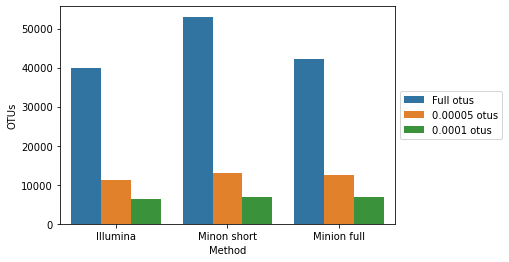

In [211]:
ax = sns.barplot(x = 'Method', y = 'OTUs', hue = 'Filtering', data = otu_counts, hue_order = ['Full otus','0.00005 otus','0.0001 otus'])
ax.set_ylabel('OTUs')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../Figures/otus_filtered_comparison.jpg', dpi = 300, bbox_inches = 'tight')

In [199]:
illumina_otus.columns[0]

'k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;'

In [205]:
def return_unclassified(df):
    taxa_levels = ['Kingdom','Phylum','Class','Order','Family','Genus','Species']
    taxa = {}
    for count, level in enumerate(taxa_levels):
        taxa[level] = [x.split(';')[count][3:] for x in df.columns]
    taxa_df = pd.DataFrame(taxa)
    percent = {}
    for column in taxa_df.columns:
        unclassified = taxa_df[column].str.count('unclassified').sum()
        percent[column] = (unclassified/taxa_df.shape[0])*100
    return percent

In [201]:
minion_short_otus.index

Index(['ARD-V-Pro-85E-1_MI', 'ARD-V-Pro-85E-2_MI', 'ARD-V-Pro-85E-3_MI',
       'ARD-V-Pro-86E-1_MI', 'ARD-V-Pro-86E-2_MI', 'ARD-V-Pro-86E-3_MI',
       'ARD-V-Pro-88C-1_MI', 'ARD-V-Pro-88C-2_MI', 'ARD-V-Pro-88C-3_MI',
       'ARD-V-Pro-89A-1_MI', 'ARD-V-Pro-89A-2_MI', 'Pen-V-Pro-1-1_MI',
       'Pen-V-Pro-1-2_MI', 'Pen-V-Pro-1-3_MI', 'Pen-V-Pro-2-1_MI',
       'Pen-V-Pro-2-2_MI', 'Pen-V-Pro-2-3_MI', 'Pen-V-Pro-3-1_MI',
       'Pen-V-Pro-3-2_MI', 'Pen-V-Pro-3-3_MI'],
      dtype='object', name='group')

In [202]:
percent_unclassified_illumina = return_unclassified(illumina_otus)
percent_unclassified_minion_short = return_unclassified(minion_short_otus)
percent_unclassified_minion_full = return_unclassified(minion_full_otus)

In [203]:
percent_unclassified = percent_unclassified_illumina
for level in percent_unclassified.keys():
    percent_unclassified[level] = [percent_unclassified[level], percent_unclassified_minion_short[level], percent_unclassified_minion_full[level]]

In [218]:
percent_unclassified_df = pd.DataFrame(percent_unclassified, index = ['Illumina','Nanopore short','Nanopore full'])
percent_unclassified_df.to_csv('../Tables/percent_unclassified.csv')
percent_unclassified_df.round(2)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
Illumina,0.0,0.04,0.89,7.03,27.10,62.35,95.34
Nanopore short,0.0,0.05,0.81,6.51,24.44,59.61,94.15
Nanopore full,0.0,0.04,0.71,6.78,26.47,62.63,95.41


# 